<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/Outliers_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Sample dataset
data = {
    'Age': [25, 30, 22, 28, 26, 120, 27, 24, 100, 23],  # 120 and 100 are outliers
    'Salary': [50000, 60000, 52000, 58000, 55000, 1000000, 57000, 54000, 900000, 51000],  # Outliers
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'Finance', 'HR', 'IT'],
    'Experience': [2, 5, 1, 4, 3, 25, 4, 2, 20, 1],  # Outliers
    'PerformanceScore': [3.5, 4.0, 3.2, 3.8, 3.7, 1.0, 3.9, 3.4, 1.2, 3.3]  # Target variable
}

df = pd.DataFrame(data)
print(df.head())


   Age  Salary Department  Experience  PerformanceScore
0   25   50000         HR           2               3.5
1   30   60000         IT           5               4.0
2   22   52000    Finance           1               3.2
3   28   58000         IT           4               3.8
4   26   55000         HR           3               3.7


In [3]:
df

,Age,Salary,Department,Experience,PerformanceScore
0,25,50000,HR,2,3.5
1,30,60000,IT,5,4.0
2,22,52000,Finance,1,3.2
3,28,58000,IT,4,3.8
4,26,55000,HR,3,3.7
5,120,1000000,Finance,25,1.0
6,27,57000,IT,4,3.9
7,24,54000,Finance,2,3.4
8,100,900000,HR,20,1.2
9,23,51000,IT,1,3.3


Outlier Detection & Removal (Numerical Columns Only)

In [4]:
df.shape

(10, 5)

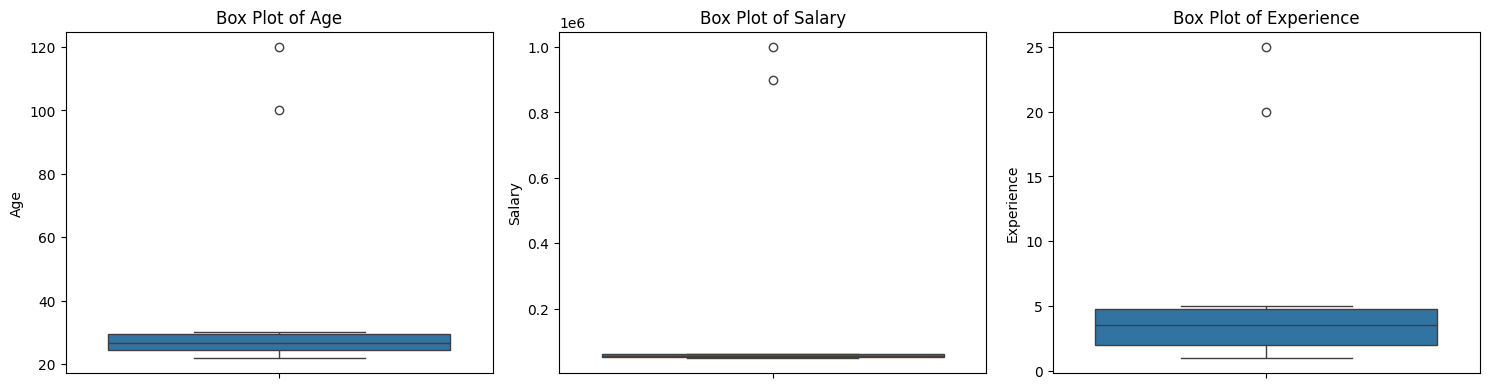

In [8]:
# Visualize outliers using boxplot
plt.figure(figsize=(15, 4))

for i, col in enumerate(['Age', 'Salary', 'Experience']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [12]:
def remove_outliers_iqr(df, num_cols):
    df_clean = df.copy()
    for col in num_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

numerical_columns = ['Age', 'Salary', 'Experience']
df_clean = remove_outliers_iqr(df, numerical_columns)

print("\nData after outlier removal:")
print(df_clean)



Data after outlier removal:
   Age  Salary  Department  Experience  PerformanceScore
0   25   50000           1           2               3.5
1   30   60000           2           5               4.0
2   22   52000           0           1               3.2
3   28   58000           2           4               3.8
4   26   55000           1           3               3.7
6   27   57000           2           4               3.9
7   24   54000           0           2               3.4
9   23   51000           2           1               3.3


In [6]:
df_clean.shape

(8, 5)

In [10]:
# Label Encode categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])

# View encoded data
print(df.head())


   Age  Salary  Department  Experience  PerformanceScore
0   25   50000           1           2               3.5
1   30   60000           2           5               4.0
2   22   52000           0           1               3.2
3   28   58000           2           4               3.8
4   26   55000           1           3               3.7


In [16]:
# Feature and target split
X = df[['Age', 'Salary', 'Department', 'Experience']]
y = df['PerformanceScore']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"\nMean Squared Error without outlier removal: {mse:.4f}")


Mean Squared Error without outlier removal: 0.1099


In [13]:
# Feature and target split
X = df_clean[['Age', 'Salary', 'Department', 'Experience']]
y = df_clean['PerformanceScore']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"\nMean Squared Error after outlier removal: {mse:.4f}")


Mean Squared Error after outlier removal: 0.0056


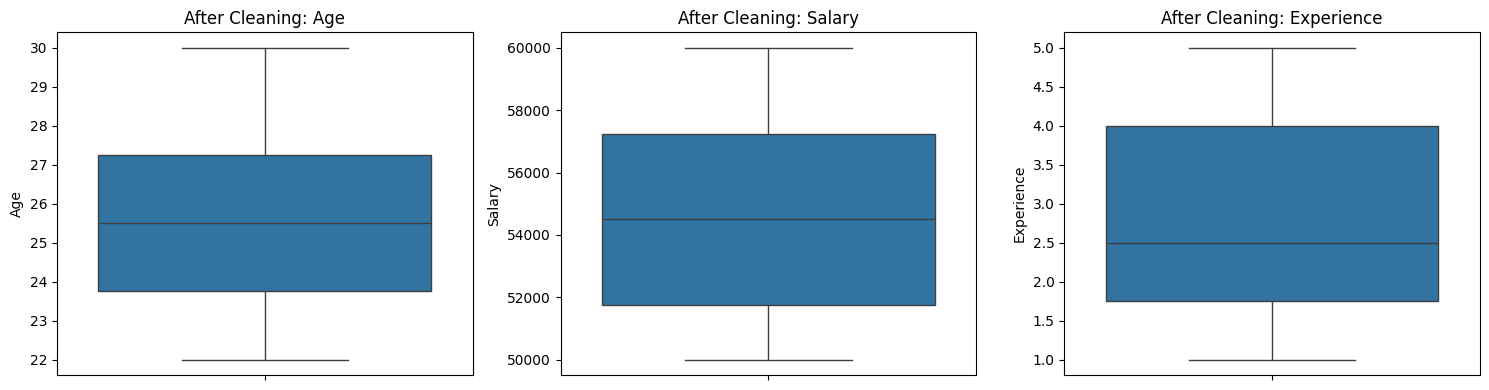

In [14]:
# Visualize after outlier removal
plt.figure(figsize=(15, 4))

for i, col in enumerate(['Age', 'Salary', 'Experience']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'After Cleaning: {col}')

plt.tight_layout()
plt.show()
